In [2]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [9]:

X,Y = make_regression(n_samples=1000, n_features=1,n_informative=1, n_targets=1 , noise=80 , random_state=13 )

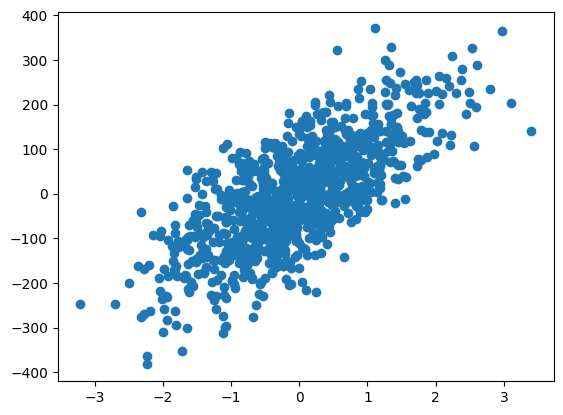

In [10]:
plt.scatter(X,Y)

In [11]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X,Y)
print(lr.coef_)
print(lr.intercept_)

[87.92927623]
2.2468617721341864


In [60]:
class GDRegressor:
    def __init__(self,learning_rate, epoch):
        self.m=0
        self.b=0
        self.lr= learning_rate
        self.epoch= epoch
    def fit(self,X,Y):
        for i in range(self.epoch):
            loss_slope_b = -2 * np.sum(Y-self.m*X.ravel()-self.b)
            loss_slope_m = -2 * np.sum((Y-self.m*X.ravel()-self.b)* X.ravel())

            self.b= self.b - (loss_slope_b*self.lr)
            self.m= self.m - (loss_slope_m*self.lr)
            # print(self.m, self.b)
        print(self.m, self.b)

    def predict(self,x):
        return self.m*x+self.b

In [61]:
gd= GDRegressor(0.0001,50)

In [62]:
gd.fit(X,Y)

87.92738307796806 2.2464065598610525


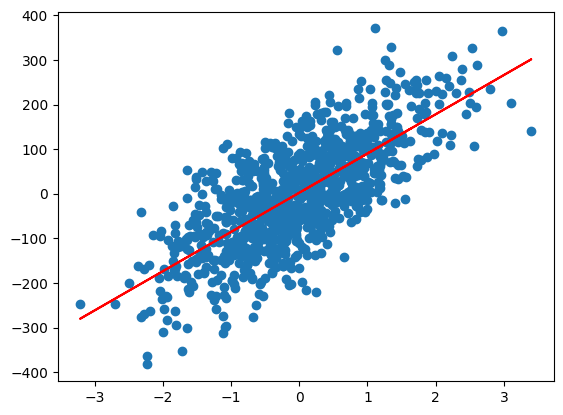

In [67]:
plt.scatter(X,Y)
plt.plot(X,gd.predict(X),"r")


### Gradient descent for n dimensional data

In [21]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
lr= LinearRegression()

In [4]:
X,y = load_diabetes(return_X_y=True)

In [11]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [14]:
x_train,x_test,y_train,y_test =train_test_split(X,y , test_size=0.2 , random_state=2)

In [15]:
lr.fit(x_train,y_train)


LinearRegression()

In [16]:
y_predict = lr.predict(x_test)

In [18]:
from sklearn.metrics import r2_score
score= r2_score(y_test,y_predict)
score

0.4399338661568968

### Gradient descent for n dimensions data

In [33]:
class NGDRegressor:
    def __init__(self,learning_rate,epoch):
        self.coef_ =None
        self.intercept_ = None
        self.lr = learning_rate
        self.epoch = epoch
    def fit(self,x,y):
        self.intercept_= 0
        self.coef_ = np.ones(x.shape[1])
        for i in range(self.epoch):
            y_hat = np.dot(x,self.coef_) + self.intercept_
            intercept_d = -2 * np.mean(y - y_hat)
            self.intercept_ = self.intercept_- (self.lr * intercept_d)

            coef_d= -2 * np.dot(( y - y_hat ), x ) / x.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_d)
        print(self.intercept_,self.coef_)
    
    def predict(self,x):
        return np.dot(x,self.coef_) + self.intercept_
                 


### User Defined Class

In [45]:
ngd= NGDRegressor(learning_rate=0.04,epoch=5000)
ngd.fit(x_train,y_train)

152.11222281458768 [  52.54252684  -79.38665894  371.63634081  260.39229399   10.58912589
  -39.70240533 -178.19951924  128.49986727  336.81738113  128.76056734]


### R2 score of User Defined Class

In [48]:
score_userDefined= r2_score(y_test,ngd.predict(x_test))
s

0.4393126765532608

### Parameter through Sklearn model

In [49]:
print(lr.coef_)
print(lr.intercept_)


[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167
